In [8]:
import pandas as pd
from pricing.pipeline_builder import load_from_csv, concatinate_dfs, drop_shop, create_text_series, extract_data
%matplotlib inline

## Loading data

In [ ]:
path = "./pricing-tool/data/10-01-2024"

lista_data = load_from_csv(path)
data = concatinate_dfs(lista_data)
data = drop_shop(data)
ad_text_series = create_text_series(data)

In [10]:
# df_ads [["model", "rom", "battery", "warranty", "locked"]]

df_ads = extract_data(ad_text_series)
df_ads["price"] = data["price"]

## Data Exploration

In [14]:
df_ads.head()

,model,rom,battery,warranty,locked,price
0,11,64,99,False,False,390
1,11,NaN,NaN,False,False,250
5,11,64,92,True,False,290
6,11pro,NaN,NaN,False,False,200
7,11,64,NaN,False,False,300


In [11]:
df_ads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1206 entries, 0 to 1462
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   model     1190 non-null   object
 1   rom       1047 non-null   object
 2   battery   767 non-null    object
 3   warranty  1206 non-null   bool  
 4   locked    1206 non-null   bool  
 5   price     1206 non-null   int64 
dtypes: bool(2), int64(1), object(3)
memory usage: 49.5+ KB


In [12]:
# Delete locked

df_ads.drop(index=df_ads[df_ads["locked"]==True].index, inplace=True)

In [13]:
df_ads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1195 entries, 0 to 1462
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   model     1180 non-null   object
 1   rom       1042 non-null   object
 2   battery   763 non-null    object
 3   warranty  1195 non-null   bool  
 4   locked    1195 non-null   bool  
 5   price     1195 non-null   int64 
dtypes: bool(2), int64(1), object(3)
memory usage: 49.0+ KB


In [11]:
df_ads = df_ads.reset_index(drop=True)
df_ads.head()

,model,rom,battery,warranty,locked,price
0,11,NaN,NaN,False,False,250
1,11,NaN,NaN,False,False,400
2,11,64,92,True,False,290
3,11,64,100,False,False,240
4,11,64,NaN,False,False,200


In [6]:
df_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   model     1132 non-null   object
 1   rom       987 non-null    object
 2   battery   724 non-null    object
 3   warranty  1144 non-null   bool  
 4   locked    1144 non-null   bool  
 5   price     1144 non-null   int64 
dtypes: bool(2), int64(1), object(3)
memory usage: 38.1+ KB


In [7]:
# NaN rom popuniti s most frequent

df_ads["rom"].unique()

array([nan, '64', '128', '256', '74', '512', '126'], dtype=object)

In [11]:
df_ads["rom"].value_counts()

rom
128    561
256    276
64     227
512     26
126      2
74       1
265      1
Name: count, dtype: int64

In [9]:
df_ads["rom"].mode().iloc[0]

'128'

In [15]:
df_ads["rom"] = df_ads["rom"].fillna(df_ads["rom"].mode().iloc[0])
df_ads["rom"].isna().sum()

0

In [9]:
df_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   model     1158 non-null   object
 1   rom       1173 non-null   object
 2   battery   730 non-null    object
 3   warranty  1173 non-null   bool  
 4   locked    1173 non-null   bool  
 5   price     1173 non-null   int64 
dtypes: bool(2), int64(1), object(3)
memory usage: 39.1+ KB


In [16]:
# Fill na model with ffill

df_ads["model"].ffill(inplace=True)
df_ads["model"].isna().sum()

0

In [9]:
df_ads["model"].unique()

array(['11', '64', '11pro', '11promax', '12', '12pro', '14', '12promax',
       '12max', '13', '13pro', '13promax', '14pro', '14promax', '14max'],
      dtype=object)

In [10]:
df_ads["model"].value_counts()

model
12pro       139
11          136
12          132
13pro       127
13promax    122
13          112
12promax    102
14promax     70
11pro        59
14pro        55
14           48
11promax     39
64            1
12max         1
14max         1
Name: count, dtype: int64

Removing invalid model information

In [17]:
modeli = ['11', 
          '11pro', 
          '11promax', 
          '12', 
          '12pro', 
          '12promax', 
          '13', 
          '13pro', 
          '13promax', 
          '14', 
          '14pro', 
          '14promax']
romovi = ['64', '128', '256', '512']

df_ads = df_ads.drop(index=df_ads[~df_ads["model"].isin(modeli)].index)
df_ads = df_ads.drop(index=df_ads[~df_ads["rom"].isin(romovi)].index)

In [14]:
df_ads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1166 entries, 0 to 1172
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   model     1166 non-null   object
 1   rom       1166 non-null   object
 2   battery   726 non-null    object
 3   warranty  1166 non-null   bool  
 4   locked    1166 non-null   bool  
 5   price     1166 non-null   int64 
dtypes: bool(2), int64(1), object(3)
memory usage: 47.8+ KB


In [18]:
df_ads_batt = df_ads.dropna()

In [19]:
df_ads_batt.drop(index=df_ads_batt[df_ads_batt["price"]>1500].index, inplace=True)

C:\Users\kanpe\AppData\Local\Temp\ipykernel_5896\3171520850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ads_batt.drop(index=df_ads_batt[df_ads_batt["price"]>1500].index, inplace=True)


In [20]:
df_ads_batt.describe()

,rom,battery,warranty,price
count,726.000000,725.000000,726.000000,726.000000
mean,151.008264,88.216552,0.099174,540.410468
std,80.224151,6.222065,0.299101,214.171184
min,64.000000,69.000000,0.000000,99.000000
25%,128.000000,85.000000,0.000000,370.000000
50%,128.000000,87.000000,0.000000,500.000000
75%,128.000000,91.000000,0.000000,690.000000
max,512.000000,100.000000,1.000000,1200.000000


In [542]:
df_ads["battery"].ffill(inplace=True)

In [13]:
df_ads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1139 entries, 0 to 1143
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   model     1139 non-null   object
 1   rom       1139 non-null   object
 2   battery   721 non-null    object
 3   warranty  1139 non-null   bool  
 4   locked    1139 non-null   bool  
 5   price     1139 non-null   int64 
dtypes: bool(2), int64(1), object(3)
memory usage: 46.7+ KB


In [21]:
df_ads = df_ads.dropna()

In [ ]:
df_ads_batt["battery"] = df_ads_batt["battery"].astype("int")
df_ads_batt["rom"] = df_ads_batt["rom"].astype("int")
df_ads_batt["warranty"] = df_ads_batt["warranty"].astype("int")

In [10]:
df_ads["battery"] = df_ads["battery"].astype("int")
df_ads["rom"] = df_ads["rom"].astype("int")
#df_ads["warranty"] = df_ads["warranty"].astype("int")

In [11]:
df_ads.describe()

,rom,price
count,1247.000000,1247.000000
mean,152.532478,542.574980
std,82.585966,224.405472
min,64.000000,5.000000
25%,128.000000,370.000000
50%,128.000000,500.000000
75%,128.000000,699.000000
max,512.000000,2000.000000


In [ ]:
df_ads_batt["battery"] = df_ads_batt["battery"].drop(index=df_ads_batt[df_ads_batt["battery"] < 60].index)
#df_ads["battery"] = df_ads["battery"].drop(index=df_ads[df_ads["battery"] < 60].index)

In [197]:
import numpy as np
from scipy import stats

In [35]:
df_ads_grouped = df_ads.groupby(["model"], as_index=True)
df_ads_batt_grouped = df_ads_batt.groupby(["model"], as_index=True)

In [46]:
df_ads_batt_grouped.get_group("14promax").describe()

,rom,battery,warranty,price
count,49.000000,49.000000,49.000000,49.000000
mean,185.469388,96.306122,0.448980,949.326531
std,101.399191,4.783670,0.502545,89.789195
min,128.000000,80.000000,0.000000,770.000000
25%,128.000000,93.000000,0.000000,900.000000
50%,128.000000,99.000000,0.000000,950.000000
75%,256.000000,100.000000,1.000000,999.000000
max,512.000000,100.000000,1.000000,1200.000000


In [213]:
df = df_ads_grouped.get_group("11")
iqr = df["price"].quantile(0.75) - df["price"].quantile(0.25)
lim = np.abs((df["price"] - df["price"].median()) / iqr) < 2.22
df.drop(index=df[~lim].index)

,model,rom,battery,warranty,locked,price
1,11,64,81.0,0,False,230
2,11,64,81.0,0,False,230
3,11,128,77.0,0,False,250
4,11,64,88.0,0,False,180
5,11,64,86.0,0,False,300
...,...,...,...,...,...,...
165,11,128,75.0,0,False,399
166,11,64,76.0,0,False,135
167,11,128,79.0,0,False,279
168,11,128,79.0,0,False,380


In [ ]:
list_dfs = []
for model in modeli:
    df = df_ads_grouped.get_group(model)
    iqr = df["price"].quantile(0.75) - df["price"].quantile(0.25)
    lim = np.abs((df["price"] - df["price"].median()) / iqr) < 2.22
    list_dfs.append(df.drop(index=df[~lim].index))
    
df_adsN = pd.concat(list_dfs, ignore_index=True)


In [216]:
df_adsN_grouped = df_adsN.groupby(["model"])

Analysing how different methods of NaN management will influence the correlation of 
Battery information and price

In [240]:
df_ads.corr(numeric_only=True)

,rom,battery,warranty,locked,price
rom,1.000000,0.175788,0.060053,NaN,0.400412
battery,0.175788,1.000000,0.340093,NaN,0.561888
warranty,0.060053,0.340093,1.000000,NaN,0.425928
locked,NaN,NaN,NaN,NaN,NaN
price,0.400412,0.561888,0.425928,NaN,1.000000


In [238]:
df_adsN.corr(numeric_only=True)

,rom,battery,warranty,locked,price
rom,1.000000,0.179228,0.066123,NaN,0.458993
battery,0.179228,1.000000,0.375920,NaN,0.596507
warranty,0.066123,0.375920,1.000000,NaN,0.413540
locked,NaN,NaN,NaN,NaN,NaN
price,0.458993,0.596507,0.413540,NaN,1.000000


In [239]:
df_ads_batt.corr(numeric_only=True)

,rom,battery,warranty,locked,price
rom,1.000000,0.175286,0.072887,NaN,0.455138
battery,0.175286,1.000000,0.444108,NaN,0.602281
warranty,0.072887,0.444108,1.000000,NaN,0.420466
locked,NaN,NaN,NaN,NaN,NaN
price,0.455138,0.602281,0.420466,NaN,1.000000


In [221]:
df_adsN_grouped.get_group("12").corr(numeric_only=True)

,rom,battery,warranty,locked,price
rom,1.000000,0.084341,0.113039,NaN,0.301019
battery,0.084341,1.000000,0.027717,NaN,0.076052
warranty,0.113039,0.027717,1.000000,NaN,0.038040
locked,NaN,NaN,NaN,NaN,NaN
price,0.301019,0.076052,0.038040,NaN,1.000000


In [222]:
df_ads_grouped.get_group("12").corr(numeric_only=True)

,rom,battery,warranty,locked,price
rom,1.000000,0.049673,-0.055489,NaN,0.082672
battery,0.049673,1.000000,0.023087,NaN,0.101153
warranty,-0.055489,0.023087,1.000000,NaN,0.636887
locked,NaN,NaN,NaN,NaN,NaN
price,0.082672,0.101153,0.636887,NaN,1.000000


In [36]:
df_ads_batt_grouped.get_group("12").corr(numeric_only=True)

,rom,battery,warranty,locked,price
rom,1.000000,-0.062393,0.061824,NaN,0.160099
battery,-0.062393,1.000000,0.059533,NaN,0.070215
warranty,0.061824,0.059533,1.000000,NaN,0.103937
locked,NaN,NaN,NaN,NaN,NaN
price,0.160099,0.070215,0.103937,NaN,1.000000


<Axes: >

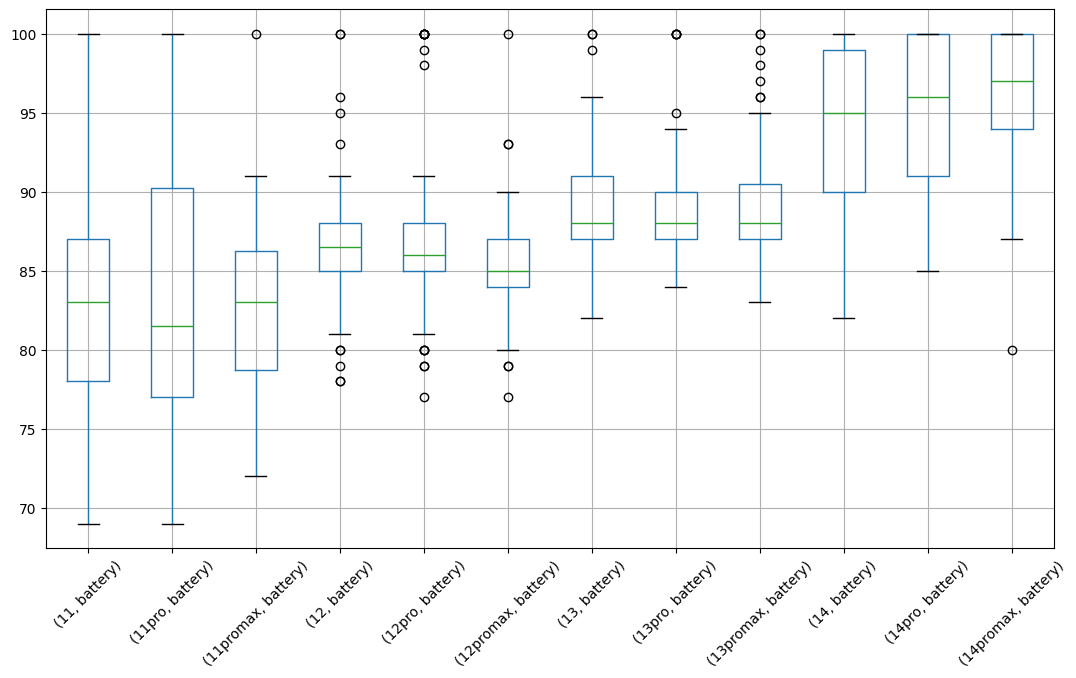

In [31]:
df_ads_batt[["battery", "model"]].groupby("model").boxplot(figsize=(13,7),
                                                   rot=45,
                                                   subplots=False
                                                   )

<Axes: >

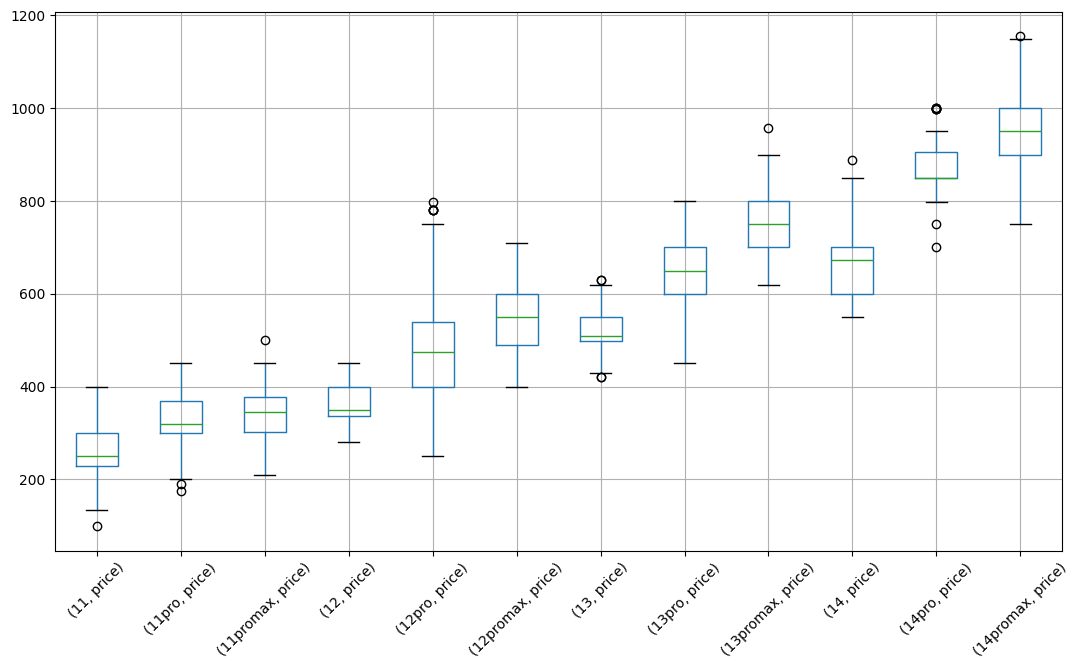

In [215]:
df_adsN[["price", "model"]].groupby("model").boxplot(figsize=(13,7),
                                                   rot=45,
                                                   subplots=False
                                                   )

In [38]:
df_ads_batt[["price", "model"]].groupby("model").boxplot(figsize=(13,7),
                                                           rot=45,
                                                        subplots=False
                                                        )

<Axes: ylabel='Density'>

Calculation Pearson Correlation Coefficient and significance of the correlation.

In [225]:
pearson_coef, p_value = stats.pearsonr(df_ads_grouped.get_group("11")['battery'], df_ads_grouped.get_group("11")['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )

The Pearson Correlation Coefficient is 0.19782984042962592  with a P-value of P = 0.013006590838298825


In [ ]:
df_adsN.dropna(inplace=True)
df_ads.dropna(inplace=True)

In [ ]:
df_ads_batt.dropna(inplace=True)

In [253]:
pearson_coef, p_value = stats.pearsonr(df_ads['rom'], df_ads['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )

The Pearson Correlation Coefficient is 0.4004316711501951  with a P-value of P = 6.292350118079755e-48


In [272]:
df_models = pd.get_dummies(df_ads["rom"])
df_models = df_models.astype("int")

In [273]:
df_ads = pd.concat([df_ads, df_models], axis=1)

In [264]:
#df_ads = df_ads.drop(modeli, axis=1)
df_ads = df_ads.dropna()

In [550]:
df_ads[["rom", "battery", "warranty", "price"]] = df_ads[["rom", "battery", "warranty", "price"]].astype("int")

In [31]:
df_ads_batt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 721 entries, 2 to 1143
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   model     721 non-null    object
 1   rom       721 non-null    int32 
 2   battery   721 non-null    int32 
 3   warranty  721 non-null    int32 
 4   locked    721 non-null    bool  
 5   price     721 non-null    int64 
dtypes: bool(1), int32(3), int64(1), object(1)
memory usage: 26.1+ KB


In [21]:
import seaborn as sns

<Axes: xlabel='battery', ylabel='price'>

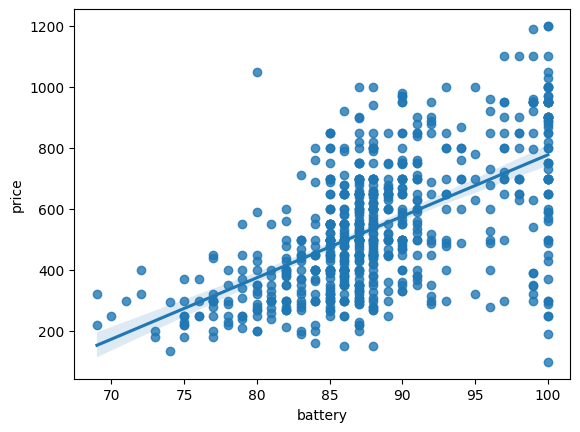

In [22]:
sns.regplot(x="battery", y="price", data=df_ads_batt)

In [ ]:
sns.residplot(x=df_ads_grouped.get_group("14promax")["battery"], y=df_ads_grouped.get_group("14promax")["price"])

# Model Development

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer


In [27]:
X = df_ads_batt[["model", "rom", "battery"]]
y = df_ads_batt["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.035, random_state=0)

preprocessor = ColumnTransformer(
    transformers=[
        ("model", OneHotEncoder(), ["model"]),
        ("rom", OneHotEncoder(), ["rom"])
    ],
    remainder="passthrough"
)

pipe = Pipeline([("preprocessor", preprocessor), 
                 ("polynomial", PolynomialFeatures(degree=3, include_bias=False)), 
                 ("model", LinearRegression())])

pipe.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('model', OneHotEncoder(),
                                                  ['model']),
                                                 ('rom', OneHotEncoder(),
                                                  ['rom'])])),
                ('polynomial',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('model', LinearRegression())])

In [28]:
pipe.score(X_train, y_train)

0.8900425147271528

In [25]:
pipe.score(X_test, y_test)

0.8924264797675978

In [18]:
Yhat_train = pipe.predict(X_train)
Yhat_test = pipe.predict(X_test)
Yhat = pipe.predict(X)

In [19]:
print('predicted:', Yhat_test[0:10])
print('test set :', y_test[0:10].values)

predicted: [ 582.0522164  1033.8405238   487.47972554  376.26300323  671.10870674
  497.96142564  650.24739097  253.50739929  502.99080304  404.00157246]
test set : [ 550 1100  460  400  650  450  680  219  535  390]


## Model Analysis

<Axes: ylabel='Density'>

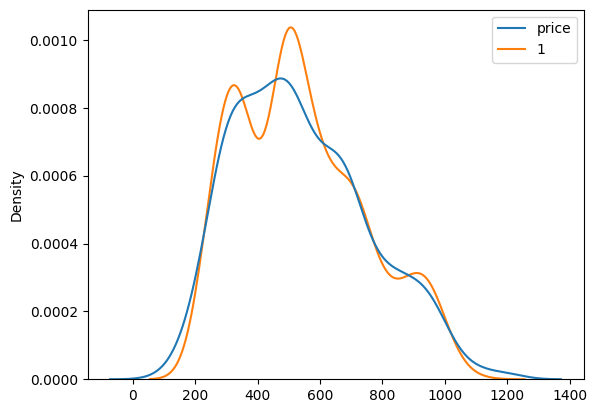

In [58]:
sns.kdeplot(data=(y, Yhat))

<Axes: ylabel='Density'>

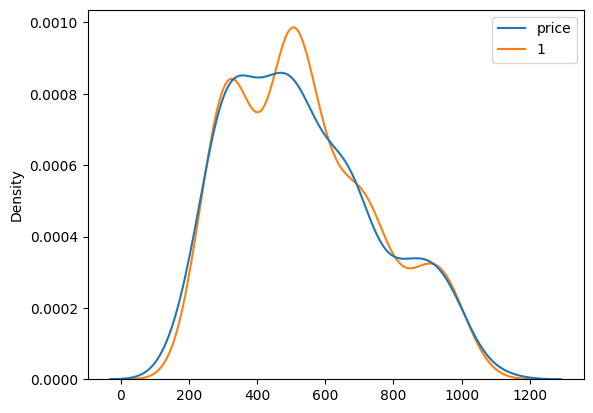

In [59]:
sns.kdeplot(data=(y_train, Yhat_train))

<Axes: ylabel='Density'>

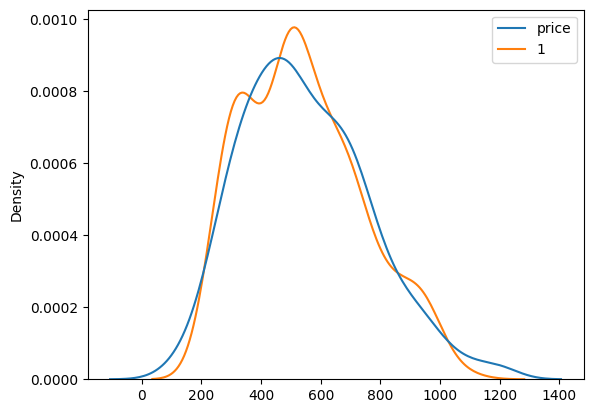

In [60]:
sns.kdeplot(data=(y_test, Yhat_test))

In [29]:
import os

In [30]:
os.chdir("c:/Users/kanpe/Documents/Python/oglasi_scraper/pricing-tool/")

In [1]:
import pickle
import pandas as pd

In [32]:
# Save trained model

with open("./pricing/model-data/reg10-01-100.pkl", "wb") as file:
    pickle.dump(pipe, file)

## Predicting with trained model

In [2]:
# Open pretrained model

with open('./pricing/model-data/reg10-01-100.pkl', 'rb') as file:
    reg1312 = pickle.load(file)

In [6]:
podaci = pd.DataFrame({"battery":[83], 
                       "rom": [128], 
                       "model": ["13"]
                       })


predictions = reg1312.predict(podaci)
print(predictions[0], predictions[0]*0.87)

450.3485576265043 391.8032451350588
